In [1]:
import pandas as pd
import numpy as np

# Simulating data
np.random.seed(42)
n = 5000  # Total users
group = np.random.choice(['A', 'B'], size=n, p=[0.5, 0.5])  # A and B groups
conversions = np.where(
    (group == 'A') & (np.random.rand(n) < 0.10), 1,  # Conversion rate 10% for A
    np.where((group == 'B') & (np.random.rand(n) < 0.12), 1, 0)  # Conversion rate 12% for B
)
data = pd.DataFrame({'Group': group, 'Conversion': conversions})
print(data.head())

  Group  Conversion
0     A           0
1     B           0
2     B           0
3     B           0
4     A           0


In [2]:
conversion_rates = data.groupby('Group')['Conversion'].mean()
print("Conversion Rates:")
print(conversion_rates)

Conversion Rates:
Group
A    0.1004
B    0.1200
Name: Conversion, dtype: float64


/tmp/ipykernel_2084/1269900423.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Group', y='Conversion', data=data, ci=False)


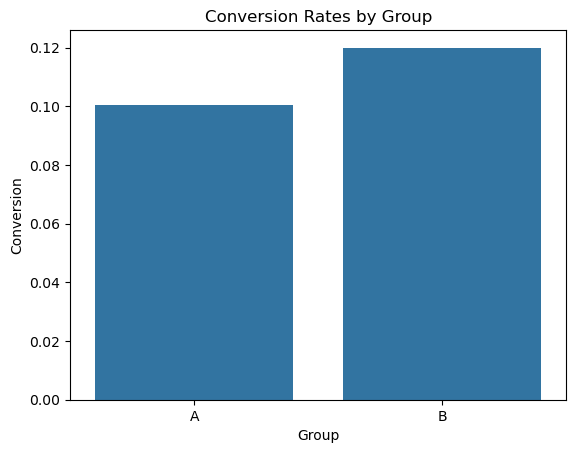

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Group', y='Conversion', data=data, ci=False)
plt.title("Conversion Rates by Group")
plt.show()

In [4]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(data['Group'], data['Conversion'])
chi2, p, _, _ = chi2_contingency(contingency)

print(f"Chi-Square Statistic: {chi2}, p-value: {p}")
if p < 0.05:
    print("Statistically significant difference!")
else:
    print("No significant difference.")

Chi-Square Statistic: 4.699357387353099, p-value: 0.030173897239870996
Statistically significant difference!


In [5]:
from scipy.stats import ttest_ind

a = data[data['Group'] == 'A']['Conversion']
b = data[data['Group'] == 'B']['Conversion']
t_stat, p_val = ttest_ind(a, b)

print(f"T-Statistic: {t_stat}, p-value: {p_val}")
if p_val < 0.05:
    print("Statistically significant improvement!")
else:
    print("No significant improvement.")

T-Statistic: -2.2136043047488094, p-value: 0.02690099975493781
Statistically significant improvement!
